# WeatherPy
----

#### Observations
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
lat_lngs = []
cities = []
while len(cities) < 500:
    lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
    lat_lngs = zip(lats, lngs)
    
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        if city not in cities:
            cities.append(city)
len(cities)    

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print("Beginning Data Retrieval\n-----------------------------\n")

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

responses = []

i = 0
for city in cities:
    i = i + 1
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        print(f"Processing Record {i} | {city}")
        responses.append(response)
    else:
        print("City not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------

Processing Record 1 | katangli
Processing Record 2 | punta arenas
City not found. Skipping...
Processing Record 4 | conceicao do araguaia
Processing Record 5 | albany
Processing Record 6 | bluff
Processing Record 7 | ilulissat
Processing Record 8 | west wendover
Processing Record 9 | kapaa
Processing Record 10 | cape town
Processing Record 11 | biak
Processing Record 12 | port blair
Processing Record 13 | bambous virieux
City not found. Skipping...
City not found. Skipping...
Processing Record 16 | kijang
Processing Record 17 | aklavik
Processing Record 18 | misratah
Processing Record 19 | lasa
Processing Record 20 | kamakhyanagar
Processing Record 21 | eastlake
Processing Record 22 | laguna
City not found. Skipping...
Processing Record 24 | san cristobal
Processing Record 25 | leua
Processing Record 26 | innisfail
Processing Record 27 | busselton
Processing Record 28 | faya
Processing Record 29 | esperance
Processing Record 30 | 

Processing Record 252 | lagdo
Processing Record 253 | udachnyy
Processing Record 254 | vardo
Processing Record 255 | bubaque
City not found. Skipping...
Processing Record 257 | san quintin
Processing Record 258 | jalu
City not found. Skipping...
City not found. Skipping...
Processing Record 261 | qeshm
Processing Record 262 | komsomolskiy
Processing Record 263 | severodvinsk
Processing Record 264 | gao
Processing Record 265 | fairbanks
Processing Record 266 | sistranda
Processing Record 267 | khuzhir
Processing Record 268 | rundu
City not found. Skipping...
Processing Record 270 | grindavik
Processing Record 271 | turtas
Processing Record 272 | lockport
Processing Record 273 | vao
Processing Record 274 | nanortalik
Processing Record 275 | padang
Processing Record 276 | saint-joseph
Processing Record 277 | college
Processing Record 278 | muros
Processing Record 279 | saint-georges
Processing Record 280 | soyo
City not found. Skipping...
Processing Record 282 | arraial do cabo
Processing

Processing Record 502 | sumbawanga
Processing Record 503 | fallon
Processing Record 504 | shu
Processing Record 505 | payson
Processing Record 506 | yumen
City not found. Skipping...
Processing Record 508 | merrill
Processing Record 509 | hovd
Processing Record 510 | tecoanapa
Processing Record 511 | nantucket
Processing Record 512 | necochea
Processing Record 513 | kosh-agach
Processing Record 514 | sayat
Processing Record 515 | santa cruz
Processing Record 516 | abha
Processing Record 517 | tigil
Processing Record 518 | altay
City not found. Skipping...
Processing Record 520 | trogir
Processing Record 521 | northam
Processing Record 522 | kenai
City not found. Skipping...
Processing Record 524 | taranto
Processing Record 525 | sur
Processing Record 526 | chokurdakh
Processing Record 527 | lavrentiya
Processing Record 528 | bengkulu
Processing Record 529 | kolyvan
Processing Record 530 | itoman
Processing Record 531 | lake city
Processing Record 532 | brae
Processing Record 533 | kaye

In [4]:
len(responses)

584

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
city_name_df = []
cloudiness_df = []
country_df = []
date_df = []
humidity_df = []
lat_df = []
lng_df = []
max_temp_df = []
wind_speed_df = []

In [22]:
for resp in responses:
    city_name_df.append(resp['name'])
    cloudiness_df.append(resp['clouds']['all'])
    country_df.append(resp['sys']['country'])
    date_df.append(resp['dt'])
    humidity_df.append(resp['main']['humidity'])
    lat_df.append(resp['coord']['lat'])
    lng_df.append(resp['coord']['lon'])
    max_temp_df.append(resp['main']['temp_max'])
    wind_speed_df.append(resp['wind']['speed'])
    
city_data_dict = {
    'City': city_name_df,
    'Cloudiness': cloudiness_df,
    'Country': country_df,
    'Date': date_df,
    'Humidity': humidity_df,
    'Lat': lat_df,
    'Lng': lng_df,
    'Max Temp': max_temp_df,
    'Wind Speed': wind_speed_df
}

city_data_df = pd.DataFrame(city_data_dict)

city_data_df.to_csv("city_data.csv", header = True)

city_data_df.head(5) 

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Katangli,0,RU,1600017124,91,51.71,143.23,48.22,6.69
1,Punta Arenas,40,CL,1600016984,61,-53.15,-70.92,46.40,16.11
2,Conceição do Araguaia,69,BR,1600017124,12,-8.26,-49.26,106.86,4.07
3,Albany,58,US,1600017096,64,42.60,-73.97,73.99,1.01
4,Bluff,100,NZ,1600017036,98,-46.60,168.33,46.99,5.99


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#none

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Max Temperature')

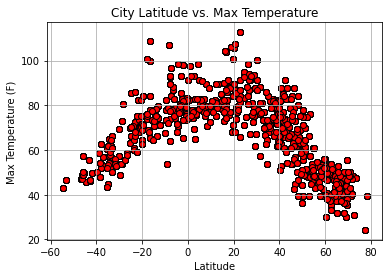

In [30]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors = "black", facecolor = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.title("City Latitude vs. Max Temperature")


## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity')

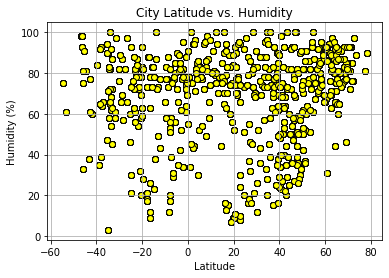

In [33]:
 x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors='black', facecolor= "yellow")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.title("City Latitude vs. Humidity")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness')

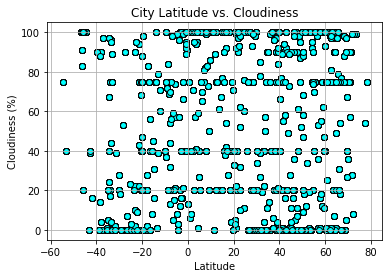

In [35]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black", facecolor ="cyan")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.title("City Latitude vs. Cloudiness")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed')

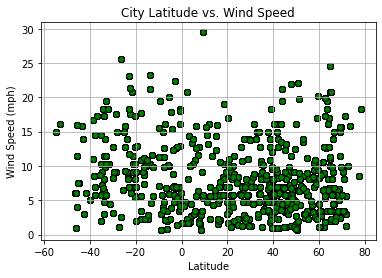

In [36]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black", facecolor ="green")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.title("City Latitude vs. Wind Speed")

## Linear Regression

In [37]:
def linear_reg_plot(df, title_name, y_column_name, y_label, file_name, xy):
    x_values = df["Lat"]
    y_values = df[y_column_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.title(title_name)
    
    print(f"The r-squared is: {rvalue}")

In [38]:
northern_hemisphere_df = city_data_df.loc[city_data_df["Lat"] > 0, :]
southern_hemisphere_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8020489132896084


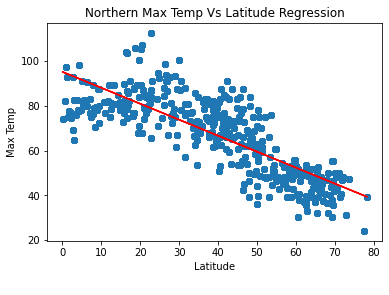

In [56]:
linear_reg_plot(northern_hemisphere_df, 'Northern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp','output_data/NorthernMaxTempVsLatitudeReg.png', (10,0))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7811733221698866


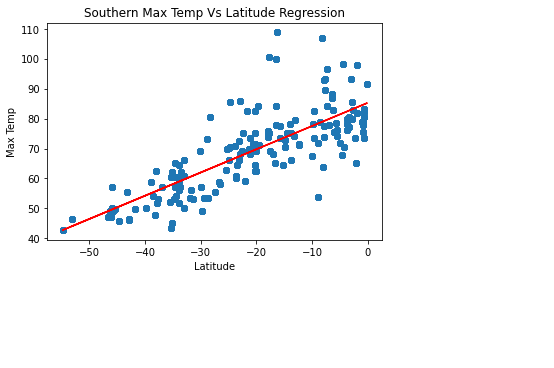

In [58]:
linear_reg_plot(southern_hemisphere_df, 'Southern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp', 'output_data/SouthernMaxTempVsLatitudeReg.png', (10,0))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1333412704676779


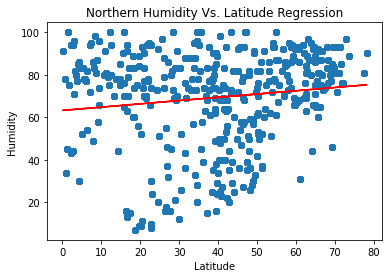

In [59]:
linear_reg_plot(northern_hemisphere_df, 'Northern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', 'output_data/NorthernHumidityVsLatitudeReg.png',(10,0))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.12352298414626255


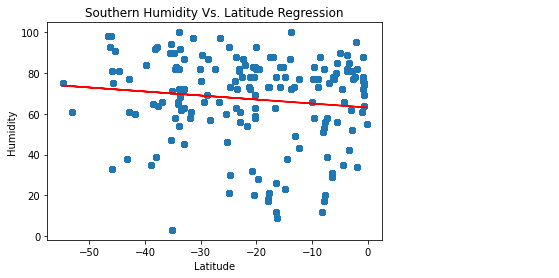

In [60]:
linear_reg_plot(southern_hemisphere_df, 'Southern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', 'output_data/SouthernHumidityVsLatitudeReg.png', (10,0))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.012652748073818462


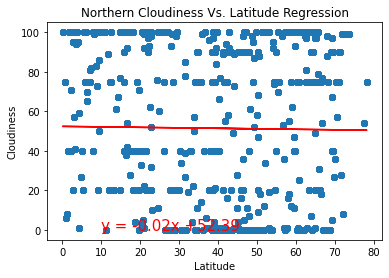

In [65]:
linear_reg_plot(northern_hemisphere_df, 'Northern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', 'output_data/NorthernCloudinessVsLatitudeReg.png', (10,0))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08069874963007818


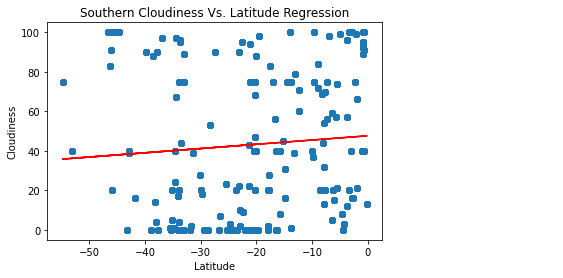

In [66]:
linear_reg_plot(southern_hemisphere_df, 'Southern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', 'output_data/SouthernCloudinessVsLatitudeReg.png', (10,0))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0755557792617407


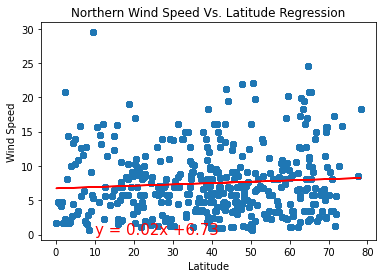

In [67]:
linear_reg_plot(northern_hemisphere_df, 'Northern Wind Speed Vs. Latitude Regression', 'Wind Speed', 'Wind Speed', 'output_data/NorthernWindSpeedVsLatitudeReg.png', (10,0))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.08507546550710052


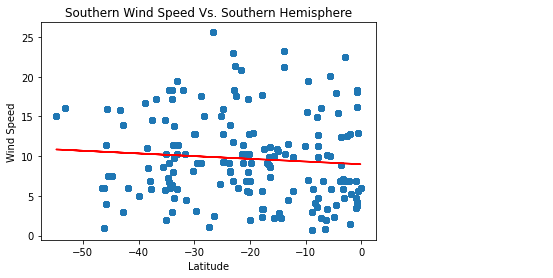

In [68]:
linear_reg_plot(southern_hemisphere_df, 'Southern Wind Speed Vs. Southern Hemisphere', 'Wind Speed', 'Wind Speed', 'output_data/SouthernWindSpeedVsLatitudeReg.png', (10,0))